### fashion mnist dataset 신경망에서 훈련

In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam 

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [4]:
tf.__version__

'2.3.0'

In [5]:
tf.keras.__version__

'2.4.0'

### 데이터 적재

In [6]:
from tensorflow.keras.datasets import fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [9]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

### 데이터 시각화

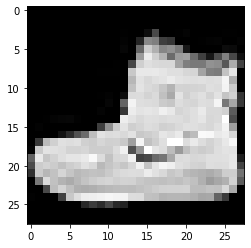

In [10]:
plt.imshow(train_images[0], cmap='gray')

In [11]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

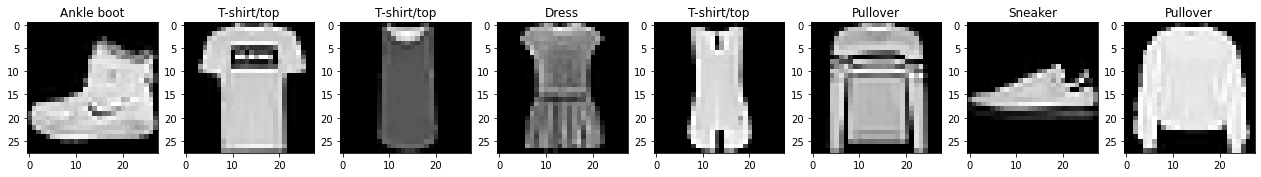

In [12]:
fig, ax = plt.subplots(figsize=(22,6), nrows=1, ncols=8)
for i in range(8):
    ax[i].imshow(train_images[i], cmap='gray')
    ax[i].set_title(class_names[train_labels[i]])

In [13]:
train_labels[:8]

array([9, 0, 0, 3, 0, 2, 7, 2], dtype=uint8)

## 데이터 전처리

In [14]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)

test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

In [15]:
train_labels_ohe = to_categorical(train_labels)
test_labels_ohe = to_categorical(test_labels)

## 모델 생성

In [16]:
tf.keras.backend.clear_session()

input_tensor = Input(shape=(28,28))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
x = Dense(50, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs = input_tensor, outputs=output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

### 모델 컴파일

In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

## 모델 학습

In [18]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1)

In [19]:
early_stopping_cb = EarlyStopping(monitor="val_loss",patience = 30, restore_best_weights=True)

In [20]:
reducelr_cb = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=10, verbose=1)

In [21]:
history = model.fit(x=train_images, y=train_labels_ohe,
                   validation_split = 0.2, batch_size=64, 
                   epochs=50, verbose=1,
                   callbacks=[checkpoint_cb, early_stopping_cb,
                             reducelr_cb])

Epoch 1/50
730/750 [============================>.] - ETA: 0s - loss: 0.5876 - accuracy: 0.7945
Epoch 00001: val_loss improved from inf to 0.54442, saving model to my_keras_model.h5
750/750 [==============================] - 2s 2ms/step - loss: 0.5846 - accuracy: 0.7956 - val_loss: 0.5444 - val_accuracy: 0.8067
Epoch 2/50
717/750 [===========================>..] - ETA: 0s - loss: 0.4015 - accuracy: 0.8545
Epoch 00002: val_loss improved from 0.54442 to 0.37582, saving model to my_keras_model.h5
750/750 [==============================] - 2s 3ms/step - loss: 0.4002 - accuracy: 0.8549 - val_loss: 0.3758 - val_accuracy: 0.8644
Epoch 3/50
736/750 [============================>.] - ETA: 0s - loss: 0.3556 - accuracy: 0.8697 ETA: 0s - loss: 0
Epoch 00003: val_loss improved from 0.37582 to 0.37569, saving model to my_keras_model.h5
750/750 [==============================] - 2s 2ms/step - loss: 0.3555 - accuracy: 0.8698 - val_loss: 0.3757 - val_accuracy: 0.8616
Epoch 4/50
719/750 [===============

Epoch 29/50
748/750 [============================>.] - ETA: 0s - loss: 0.1183 - accuracy: 0.9570
Epoch 00029: val_loss did not improve from 0.31704
750/750 [==============================] - 1s 1ms/step - loss: 0.1182 - accuracy: 0.9570 - val_loss: 0.3566 - val_accuracy: 0.8966
Epoch 30/50
711/750 [===========================>..] - ETA: 0s - loss: 0.1146 - accuracy: 0.9584
Epoch 00030: val_loss did not improve from 0.31704
750/750 [==============================] - 1s 2ms/step - loss: 0.1159 - accuracy: 0.9579 - val_loss: 0.3543 - val_accuracy: 0.8947
Epoch 31/50
711/750 [===========================>..] - ETA: 0s - loss: 0.1142 - accuracy: 0.9588
Epoch 00031: val_loss did not improve from 0.31704
750/750 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9590 - val_loss: 0.3646 - val_accuracy: 0.8953
Epoch 32/50
747/750 [============================>.] - ETA: 0s - loss: 0.1115 - accuracy: 0.9600
Epoch 00032: val_loss did not improve from 0.31704
750/750 [======

In [22]:
history.history['val_loss']

[0.544421374797821,
 0.3758244216442108,
 0.37568724155426025,
 0.3530378043651581,
 0.35418346524238586,
 0.3521650433540344,
 0.3434181809425354,
 0.34854215383529663,
 0.3232496678829193,
 0.3273243308067322,
 0.3329830467700958,
 0.33366814255714417,
 0.328340619802475,
 0.3399718105792999,
 0.31704026460647583,
 0.3283231556415558,
 0.3329187333583832,
 0.33329084515571594,
 0.34296002984046936,
 0.34388819336891174,
 0.34148746728897095,
 0.3681814670562744,
 0.35506054759025574,
 0.3434486985206604,
 0.3682286739349365,
 0.343129426240921,
 0.34412726759910583,
 0.3501587212085724,
 0.35662466287612915,
 0.35429492592811584,
 0.36455994844436646,
 0.3665291666984558,
 0.3681739568710327,
 0.3792269825935364,
 0.38443437218666077,
 0.3801420032978058,
 0.38011986017227173,
 0.3814912438392639,
 0.38087475299835205,
 0.38283824920654297,
 0.38304007053375244,
 0.38414183259010315,
 0.38453471660614014,
 0.3845806419849396,
 0.3852643668651581]

In [23]:
history.history['val_accuracy']

[0.8066666722297668,
 0.8644166588783264,
 0.8615833520889282,
 0.8702499866485596,
 0.8741666674613953,
 0.8715000152587891,
 0.878083348274231,
 0.8771666884422302,
 0.8843333125114441,
 0.8863333463668823,
 0.8820000290870667,
 0.8814166784286499,
 0.8870833516120911,
 0.875083327293396,
 0.887666642665863,
 0.8867499828338623,
 0.8872500061988831,
 0.89083331823349,
 0.8808333277702332,
 0.8855833411216736,
 0.8895000219345093,
 0.8868333101272583,
 0.8872500061988831,
 0.893833339214325,
 0.8822500109672546,
 0.8951666951179504,
 0.8954166769981384,
 0.8949999809265137,
 0.8965833187103271,
 0.8946666717529297,
 0.8952500224113464,
 0.8964166641235352,
 0.8974166512489319,
 0.8945833444595337,
 0.8948333263397217,
 0.8956666588783264,
 0.8959166407585144,
 0.8963333368301392,
 0.8955000042915344,
 0.8961666822433472,
 0.8955000042915344,
 0.8950833082199097,
 0.8957499861717224,
 0.8954166769981384,
 0.8953333497047424]

### 시험데이터로 예측

In [24]:
predict_prob = model.predict(test_images)

In [25]:
predict_prob.shape

(10000, 10)

In [26]:
predict_prob[0]

array([9.2389714e-09, 1.0344701e-06, 1.5001479e-08, 1.9488213e-09,
       1.4217942e-08, 2.0780315e-04, 6.0352128e-09, 8.0871033e-03,
       2.5979714e-09, 9.9170399e-01], dtype=float32)

In [27]:
test_labels[0]

9.0

In [28]:
test_image0_predict = model.predict(np.reshape(test_images[0], (-1, 28, 28)))

In [29]:
test_image0_predict

array([[9.2389714e-09, 1.0344701e-06, 1.5001479e-08, 1.9488213e-09,
        1.4217969e-08, 2.0780315e-04, 6.0352128e-09, 8.0871033e-03,
        2.5979665e-09, 9.9170399e-01]], dtype=float32)

In [30]:
np.reshape(test_images[0], (-1, 28, 28)).shape

(1, 28, 28)

In [31]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [32]:
ls

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: 269C-4EA6

 D:\jupy\211014 디렉터리

2021-10-14  오후 11:03    <DIR>          .
2021-10-14  오후 11:03    <DIR>          ..
2021-10-14  오후 10:33    <DIR>          .ipynb_checkpoints
2021-10-14  오후 12:56               821 211014 class 3.ipynb
2021-10-14  오전 09:14               779 211014 class1 .ipynb
2021-10-14  오후 02:47             2,037 211014 class5 .ipynb
2021-10-14  오후 03:51             6,395 211014 class6.ipynb
2021-10-14  오후 06:17            13,006 211014 class7.ipynb
2021-10-14  오후 10:30            68,031 211014 revision1 fashion.ipynb
2021-10-14  오후 11:03            63,519 211014 revision2 fashion mnist 2.ipynb
2021-10-14  오후 02:11    <DIR>          dataset
2021-10-14  오후 09:43            69,528 Deep_Learning_day_3_(keras_Fashion_MNIST).ipynb
2021-10-14  오후 08:26            54,112 Deep_Learning_day_3_(keras_MNIST).ipynb
2021-10-14  오후 09:43            82,441 Deep_Learning_day_4_(functional_api).ipynb
2021-10-14  오후 10:57         1,103,656 my_keras_model.h5

In [33]:
# 모델 저장 
saved_model = load_model('my_keras_model.h5')

In [34]:
#저장 모델 평가 
saved_model.evaluate(test_images, test_labels_ohe, batch_size=100)

100/100 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8830


[0.34204965829849243, 0.8830000162124634]

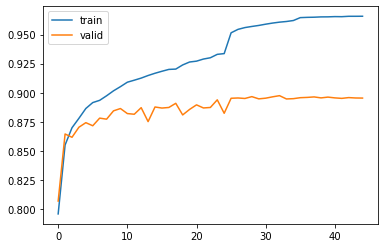

In [35]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()